In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path='../JSON Files'

In [3]:
from os import listdir
from os.path import isfile,join
# putting all file paths in jsonfiles
jsonfiles = [f for f in listdir(path) if isfile(join(path,f))]

In [4]:
mi="Mumbai Indians"
rcb="Royal Challengers Bangalore"

## Testing single file

In [5]:
f=open(path+'/'+jsonfiles[0],)
data=json.load(f)
data

{'meta': {'data_version': '1.0.0', 'created': '2017-04-06', 'revision': 1},
 'info': {'balls_per_over': 6,
  'city': 'Hyderabad',
  'dates': ['2017-04-05'],
  'event': {'match_number': 1, 'name': 'Indian Premier League'},
  'gender': 'male',
  'match_type': 'T20',
  'officials': {'match_referees': ['J Srinath'],
   'reserve_umpires': ['N Pandit'],
   'tv_umpires': ['A Deshmukh'],
   'umpires': ['AY Dandekar', 'NJ Llong']},
  'outcome': {'by': {'runs': 35}, 'winner': 'Sunrisers Hyderabad'},
  'overs': 20,
  'player_of_match': ['Yuvraj Singh'],
  'players': {'Royal Challengers Bangalore': ['CH Gayle',
    'Mandeep Singh',
    'TM Head',
    'KM Jadhav',
    'SR Watson',
    'Sachin Baby',
    'STR Binny',
    'S Aravind',
    'TS Mills',
    'YS Chahal',
    'A Choudhary'],
   'Sunrisers Hyderabad': ['DA Warner',
    'S Dhawan',
    'MC Henriques',
    'Yuvraj Singh',
    'DJ Hooda',
    'BCJ Cutting',
    'NV Ojha',
    'Bipul Sharma',
    'B Kumar',
    'A Nehra',
    'Rashid Khan']},


### We will separte years RCB matches of 2018 and MI matches of 2019-2020

In [6]:
def getMatches(year,team):
    matches=[]
    for file in jsonfiles:
        f=open(path+'/'+file,)
        data=json.load(f)
        info=data.get('info')
        date=info.get('dates')
        split=date[0].split('-')
        year_str=split[0]
        year_int=int(year_str)
        if year_int==year:
            innings=data.get('innings')
            for inning in innings:
                if inning.get('team')==team:
                    matches.append(file)
    matches=list(set(matches))
    return matches

In [7]:
matches_2018=getMatches(2018,rcb) #contains all rcb matches 
matches_2019=getMatches(2019,mi) #contains all mi matches
matches_2020=getMatches(2020,mi) #contains all mi matches
matches_2021=getMatches(2021,mi) #contains all mi matches

print(len(matches_2018))
print(len(matches_2019))
print(len(matches_2020))
print(len(matches_2021))

14
16
16
14


In [8]:
f=open(path+'/'+matches_2018[0],)
data=json.load(f)
data

{'meta': {'data_version': '1.0.0', 'created': '2019-04-18', 'revision': 1},
 'info': {'balls_per_over': 6,
  'city': 'Bengaluru',
  'dates': ['2018-04-15'],
  'event': {'name': 'Indian Premier League', 'match_number': 11},
  'gender': 'male',
  'match_type': 'T20',
  'officials': {'match_referees': ['M Nayyar'],
   'reserve_umpires': ['K Srinath'],
   'tv_umpires': ['A Deshmukh'],
   'umpires': ['C Shamshuddin', 'S Ravi']},
  'outcome': {'winner': 'Rajasthan Royals', 'by': {'runs': 19}},
  'overs': 20,
  'player_of_match': ['SV Samson'],
  'players': {'Rajasthan Royals': ['AM Rahane',
    'DJM Short',
    'SV Samson',
    'BA Stokes',
    'JC Buttler',
    'RA Tripathi',
    'K Gowtham',
    'S Gopal',
    'DS Kulkarni',
    'JD Unadkat',
    'B Laughlin'],
   'Royal Challengers Bangalore': ['BB McCullum',
    'Q de Kock',
    'V Kohli',
    'AB de Villiers',
    'Mandeep Singh',
    'P Negi',
    'Washington Sundar',
    'CR Woakes',
    'UT Yadav',
    'K Khejroliya',
    'YS Chahal'

In [9]:
batsman='Q de Kock'
player='Q de Kock'

### Get Runs, balls played, position and out status

In [10]:
def get_details(files,team):
    score_arr=[]
    balls_arr=[]
    pos_arr=[]
    out_arr=[]
    dates=[]
    for file in files:
        f=open(path+'/'+file,)
        data=json.load(f)
        info=data.get('info')
        date=info['dates'][0]
        players=info.get('players')
        team_players=players.get(team)
        index=-1
        if batsman in team_players:
            index=team_players.index(batsman)
            innings=data.get('innings')
            for i in range(0,2):
                inning=innings[i]
                score=0
                balls=0
                out=0
                batted=False
                if inning.get('team')==team:
                    overs=inning.get('overs')
                    for over in overs:
                        for delivery in over.get('deliveries'):
                            if delivery.get('batter')==batsman or delivery.get('non_striker')==batsman:
                                batted=True
                                runs=delivery.get('runs')
                                if delivery.get('batter')==batsman:
                                    if delivery.get('extras') and delivery.get('extras').get('wides'):
                                        continue
                                    score=score+runs.get('batter')
                                    balls=balls+1
                                    if 'wickets' in delivery:
                                        wickets=delivery.get('wickets')
                                        for wicket in wickets:
                                            if wicket.get('player_out')==batsman:
                                                out=1
                    if batted:
                        score_arr.append(score)
                        balls_arr.append(balls)
                        pos_arr.append(index+1)
                    else:
                        score_arr.append(0)
                        balls_arr.append(0)
                        pos_arr.append(-1)
                        out=0
                    out_arr.append(out)
                    dates.append(date)
    return score_arr,balls_arr,pos_arr,out_arr,dates

In [11]:
score,balls,position,out,date=get_details(matches_2018,rcb) #details of 2018
col={'score':score,'balls':balls,'position':position,'out':out,'date':date}
df_2018=pd.DataFrame(data=col)
df_2018['year']=2018
df_2018.sort_values(by=['date'],inplace=True)
df_2018.reset_index(False,inplace=True)
df_2018

,index,score,balls,position,out,date,year
0,2,4,4,2,1,2018-04-08,2018
1,6,45,34,1,1,2018-04-13,2018
2,0,26,19,2,1,2018-04-15,2018
3,3,19,12,2,1,2018-04-17,2018
4,7,18,16,1,0,2018-04-21,2018
5,1,53,37,1,1,2018-04-25,2018
6,4,29,27,1,1,2018-04-29,2018
7,5,7,13,2,1,2018-05-01,2018


In [12]:
score,balls,position,out,date=get_details(matches_2019,mi) #details of 2019
col={'score':score,'balls':balls,'position':position,'out':out,'date':date}
df_2019=pd.DataFrame(data=col)
df_2019['year']=2019
df_2019.sort_values(by=['date'],inplace=True)
df_2019.reset_index(False,inplace=True)
df_2019

,index,score,balls,position,out,date,year
0,12,27,16,2,1,2019-03-24,2019
1,2,23,20,1,1,2019-03-28,2019
2,5,60,39,2,1,2019-03-30,2019
3,1,4,7,1,1,2019-04-03,2019
4,4,19,18,2,1,2019-04-06,2019
5,14,24,23,1,1,2019-04-10,2019
6,3,81,52,2,1,2019-04-13,2019
7,6,40,26,1,1,2019-04-15,2019
8,15,35,27,2,0,2019-04-18,2019
9,7,65,47,1,1,2019-04-20,2019


In [13]:
score,balls,position,out,date=get_details(matches_2020,mi) #details of 2020
col={'score':score,'balls':balls,'position':position,'out':out,'date':date}
df_2020=pd.DataFrame(data=col)
df_2020['year']=2020
df_2020.sort_values(by=['date'],inplace=True)
df_2020.reset_index(False,inplace=True)
df_2020

,index,score,balls,position,out,date,year
0,7,33,20,2,1,2020-09-19,2020
1,11,1,3,1,1,2020-09-23,2020
2,14,14,15,2,1,2020-09-28,2020
3,9,0,5,1,1,2020-10-01,2020
4,8,67,39,2,1,2020-10-04,2020
5,3,23,15,1,1,2020-10-06,2020
6,2,53,36,2,1,2020-10-11,2020
7,5,78,44,2,0,2020-10-16,2020
8,0,53,43,2,1,2020-10-18,2020
9,12,46,37,1,0,2020-10-23,2020


In [14]:
score,balls,position,out,date=get_details(matches_2021,mi) #details of 2021
col={'score':score,'balls':balls,'position':position,'out':out,'date':date}
df_2021=pd.DataFrame(data=col)
df_2021['year']=2021
df_2021.sort_values(by=['date'],inplace=True)
df_2021.reset_index(False,inplace=True)
df_2021

,index,score,balls,position,out,date,year
0,0,2,6,2,1,2021-04-13,2021
1,10,40,39,1,1,2021-04-17,2021
2,6,2,4,2,1,2021-04-20,2021
3,2,3,5,1,1,2021-04-23,2021
4,5,70,50,2,0,2021-04-29,2021
5,9,38,28,1,1,2021-05-01,2021
6,1,17,12,1,1,2021-09-19,2021
7,3,55,42,2,1,2021-09-23,2021
8,7,24,23,2,1,2021-09-26,2021
9,4,27,29,2,1,2021-09-28,2021


In [15]:
df_rcb=df_2018.copy()
df_rcb.head()

,index,score,balls,position,out,date,year
0,2,4,4,2,1,2018-04-08,2018
1,6,45,34,1,1,2018-04-13,2018
2,0,26,19,2,1,2018-04-15,2018
3,3,19,12,2,1,2018-04-17,2018
4,7,18,16,1,0,2018-04-21,2018


In [16]:
df_mi=pd.concat([df_2019,df_2020,df_2021],ignore_index=True)
df_mi.head()

,index,score,balls,position,out,date,year
0,12,27,16,2,1,2019-03-24,2019
1,2,23,20,1,1,2019-03-28,2019
2,5,60,39,2,1,2019-03-30,2019
3,1,4,7,1,1,2019-04-03,2019
4,4,19,18,2,1,2019-04-06,2019


In [17]:
df=pd.concat([df_rcb,df_mi],ignore_index=True)
df.shape

(51, 7)

In [18]:
df.to_csv('dekock.csv',index=False)

## Runs, Average and Strike Rate each year

In [19]:
runs=[]
sr=[] #strike rate
years=[y for y in range(2018,2022)]
for year in years:
    df_new=df[df['year']==year]
    run=df_new['score'].sum()
    ball=df_new['balls'].sum()
    sr.append((run*100)/ball)
    runs.append(run)
avg=[25.12,35.26,35.92,29.70] 
print(avg)
print(runs)
print(sr)

[25.12, 35.26, 35.92, 29.7]
[201, 529, 503, 297]
[124.07407407407408, 132.9145728643216, 140.50279329608938, 116.015625]


In [20]:
df_stats=pd.DataFrame({'Years':years,'Runs':runs,'Average':avg,'Strike Rate':sr})
df_stats.to_csv('dekock_stats.csv',index=False)
df_stats

,Years,Runs,Average,Strike Rate
0,2018,201,25.12,124.074074
1,2019,529,35.26,132.914573
2,2020,503,35.92,140.502793
3,2021,297,29.70,116.015625


### RCB matches of 2018

In [21]:
files_2018=[]
for file in jsonfiles:
    f=open(path+'/'+file,)
    data=json.load(f)
    info=data.get('info')
    players=info.get('players')
    date=info.get('dates')
    split=date[0].split('-')
    year_str=split[0]
    year_int=int(year_str)
    if year_int==2018:
        for key in players:
            if key==rcb:
                files_2018.append(file)

In [22]:
len(files_2018)

14

### Finding consitency of the matches he played

In [23]:
matches=[]
for file in files_2018:
    f=open(path+'/'+file,)
    data=json.load(f)
    info=data.get('info')
    players=info.get('players')
    for key in players:
        if key==rcb:
            if player in players[key]:
                matches.append(1)
            else:
                matches.append(0)

matches

[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

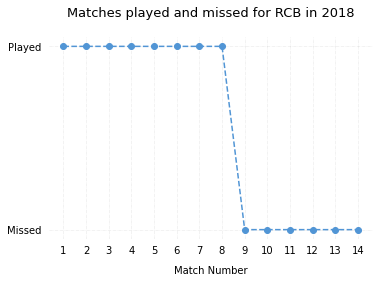

In [24]:
match_no=[x for x in range(1,15)]
fig=plt.figure()
ax=fig.add_axes([0.15,0.13,0.75,0.70])
ax.plot(match_no,matches,marker='o',linestyle='--',color='#5195d5')

ax.grid(b=True, color='grey',linestyle='-.',linewidth=0.5,alpha=0.2,zorder=0)
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
    
ax.set_xlabel('Match Number',labelpad=10)
ax.set_xticks(match_no)
ax.set_yticks([1,0])
ax.set_yticklabels(['Played','Missed'])

fig_title='Matches played and missed for RCB in 2018'
ax.text(0.5, 1.1, fig_title,horizontalalignment='center',fontsize=13,transform = ax.transAxes)
plt.savefig('graphs/Matches played and missed for RCB.png',dpi=300)

#### Conclusion - Did not play the second half for RCB

In [25]:
#Now we will find the aggregate runs he scores in first and second half for years 2019,2020 where he palyed all the matches

In [26]:
f_inn=[df_2018['score'].sum()]
s_inn=[]

In [27]:
f_inn.append(df_2019.iloc[0:8]['score'].sum())
f_inn.append(df_2020.iloc[0:8]['score'].sum())
s_inn.append(df_2019.iloc[8:]['score'].sum())
s_inn.append(df_2020.iloc[8:]['score'].sum())
print(f_inn,s_inn)

[201, 278, 269] [251, 234]


In [28]:
s_score=((251+234)*201)/(278+269)
print(s_score)

178.21755027422304


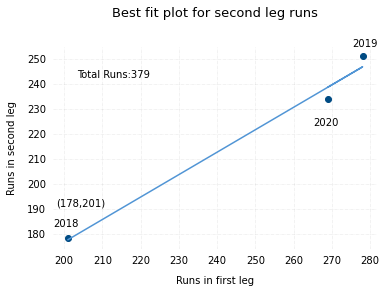

In [29]:
s_inn=[s_score,251,234]
f_inn=np.array(f_inn)
s_inn=np.array(s_inn)
m,b=np.polyfit(f_inn,s_inn,1)
fig=plt.figure()
ax=fig.add_axes([0.15,0.13,0.75,0.70])
ax.plot(f_inn,s_inn,'go',color='#004b83')
ax.plot(f_inn,m*f_inn+b,color='#5195d5')

ax.grid(b=True,color='grey',linestyle='-.',linewidth=0.5,alpha=0.2,zorder=0)
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.set_xlabel('Runs in first leg',labelpad=10)
ax.set_ylabel('Runs in second leg',labelpad=10)

fig_title='Best fit plot for second leg runs'
ax.text(0.5, 1.15,fig_title,horizontalalignment='center',fontsize=13,transform=ax.transAxes)
ax.text(0,0.11,2018,horizontalalignment='left',fontsize=10,transform=ax.transAxes)
ax.text(1,1,2019,horizontalalignment='right',fontsize=10,transform=ax.transAxes)
ax.text(0.88,0.61,2020,horizontalalignment='right',fontsize=10,transform=ax.transAxes)

runs=str(int(s_score+201))
ax.text(0.30,0.85,'Total Runs:'+runs,horizontalalignment='right',fontsize=10,transform=ax.transAxes)
ax.text(0.16,0.21,'({s},201)'.format(s=int(s_score)),horizontalalignment='right',fontsize=10,transform=ax.transAxes)


plt.savefig('graphs/Second half score prediction.png',dpi=300)

plt.show()

In [30]:
players_lst=[]
runs_lst=[]
balls_lst=[]
def get_runs_balls():
    for file in files_2018:
        f=open(path+'/'+file,)
        data=json.load(f)
        info=data.get('info')
        date=info.get('dates')
        teams=info.get('players')
        team_names=info.get('teams')
        if rcb not in team_names:
            continue
        for team in teams:
            if team!=rcb:
                continue
            for i in range(0,11):
                bat=teams[team][i]
                if bat not in players_lst:
                    players_lst.append(bat)
                    runs_lst.append(0)
                    balls_lst.append(0)
        innings=data.get('innings')
        for i in range(0,2):
            inning=innings[i]
            overs=inning.get('overs')
            for over in overs:
                for delivery in over.get('deliveries'):
                    batter=delivery.get('batter')
                    if batter not in players_lst:
                        continue
                    idx=players_lst.index(batter)
                    runs=delivery.get('runs')
                    if delivery.get('extras') and delivery.get('extras').get('wides'):
                            continue
                    
                    index=players_lst.index(batter)
                    runs_lst[idx]=runs_lst[idx]+runs.get('batter')
                    balls_lst[idx]=balls_lst[idx]+1

In [31]:
get_runs_balls()

In [32]:
df_final=pd.DataFrame({'Players':players_lst,'Runs':runs_lst,'Balls':balls_lst})
df_final.head()

,Players,Runs,Balls
0,BB McCullum,127,88
1,Q de Kock,201,162
2,V Kohli,530,381
3,AB de Villiers,480,275
4,SN Khan,51,41


In [33]:
df_final.loc[df_final['Players']==player,'Runs']=379

In [34]:
df_final

,Players,Runs,Balls
0,BB McCullum,127,88
1,Q de Kock,379,162
2,V Kohli,530,381
3,AB de Villiers,480,275
4,SN Khan,51,41
5,Mandeep Singh,252,186
6,CR Woakes,17,19
7,Washington Sundar,65,38
8,UT Yadav,3,11
9,K Khejroliya,0,0


In [35]:
df_final.sort_values(by=['Runs'],ascending=False,inplace=True)
df_final

,Players,Runs,Balls
2,V Kohli,530,381
3,AB de Villiers,480,275
1,Q de Kock,379,162
5,Mandeep Singh,252,186
18,PA Patel,153,109
15,C de Grandhomme,131,84
0,BB McCullum,127,88
19,MM Ali,77,46
7,Washington Sundar,65,38
14,M Vohra,55,47


In [36]:
df_top5=df_final.iloc[:5,:]
df_top5

,Players,Runs,Balls
2,V Kohli,530,381
3,AB de Villiers,480,275
1,Q de Kock,379,162
5,Mandeep Singh,252,186
18,PA Patel,153,109


In [37]:
players=list(df_top5['Players'])
runs=list(df_top5['Runs'])

<ipython-input-38-626cb0ad069e>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(players,rotation=45,fontsize=8)


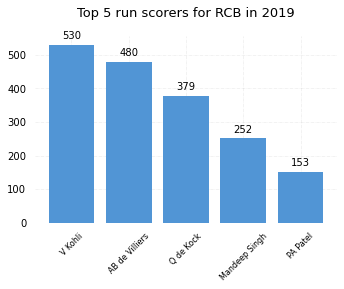

In [38]:
fig=plt.figure()
ax=fig.add_axes([0.20,0.23,0.70,0.65])

ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2,zorder=0)

for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=5)

fig_title='Top 5 run scorers for RCB in 2019'
ax.text(0.5, 1.10,fig_title,horizontalalignment='center',fontsize=13,transform=ax.transAxes)

ax.set_xticklabels(players,rotation=45,fontsize=8)

def autolabel(rects):
    for rect in rects:
        height=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 10+height,
                '%d' % int(height),
                ha='center', va='bottom')

rects1=ax.bar(players,runs,label='Runs',align='center',color='#5195d5',zorder=3)
autolabel(rects1)

plt.savefig('graphs/Top 5 run scorers for RCB in 2019.png',dpi=300)
plt.show()

### The Number of matches he played and missed each year

In [39]:
played=[]
missed=[]

In [40]:
for y in range(2018,2019):
    df_y=df[df['year']==y]
    play=df_y.shape[0]
    total=len(getMatches(y,rcb))
    played.append(play)
    missed.append(total-play)

for y in range(2019,2022):
    df_y=df[df['year']==y]
    play=df_y.shape[0]
    total=len(getMatches(y,mi))
    played.append(play)
    missed.append(total-play)

In [41]:
print(played,missed)

[8, 16, 16, 11] [6, 0, 0, 3]


In [42]:
years=[y for y in range(2018,2022)]

<ipython-input-43-21adc7af739a>:22: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb=leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


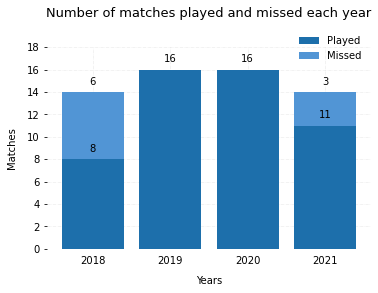

In [43]:
fig=plt.figure()
ax=fig.add_axes([0.15,0.13,0.75,0.70])
rects1 = ax.bar(years,played,color='#1d6fab',zorder=3)
rects2 = ax.bar(years,missed,color='#5195d5',bottom=played,zorder=3)

ax.grid(b=True, color='grey',linestyle='-.',linewidth=0.5,alpha=0.2,zorder=0)
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')

ax.set_xlabel('Years',labelpad=10)
ax.set_ylabel('Matches',labelpad=10)

ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax.set_xticks(years)
ax.set_xticklabels(years)

leg=ax.legend((rects1[0],rects2[0]),('Played', 'Missed'),frameon=False)

# Get the bounding box of the original legend
bb=leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 0
yOffset = 0.1
bb.x0 += xOffset
bb.x1 += xOffset
bb.y0 += yOffset
bb.y1 += yOffset
leg.set_bbox_to_anchor(bb,transform=ax.transAxes)

def autolabel(rects):
    for rect in rects:
        height=rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 0.5+height,'%d' % int(height),ha='center', va='bottom')

autolabel(rects1)
for (rect1,rect2) in zip(rects1,rects2):
    height=rect1.get_height()+rect2.get_height()
    if rect2.get_height()==0:
            continue
    ax.text(rect2.get_x()+rect2.get_width()/2.,0.5+height,'%d' % int(rect2.get_height()),ha='center', va='bottom')

fig_title='Number of matches played and missed each year'
ax.text(0.5, 1.15, fig_title,horizontalalignment='center',fontsize=13,transform = ax.transAxes)
plt.savefig('graphs/Matches played and missed in each year.png',dpi=300)

plt.show()